<a id="top"></a>

<div align="center">
    <font face="Times" size=6>Modélisation mathématique<br><br>
        <b>Modèles compartimentaux en épidémiologie</b><br></font><br>
    <font face="Times" size=4>L. Pissot</font>
</div>

<div class="alert alert-info">
<font size=6 face="Times" color="black"><b>Table des matières </b></font><br><br>

<font face="Times" size=5 color="blue"><b><a href="#p1"> 1. Principes et définitions</a></b></font><br><br>

<font face="Times" size=5 color="blue"><b><a href="#p2"> 2. Mise en équation</a></b></font><br><br>

<font face="Times" size=5 color="blue"><b><a href="#p3"> 3. Mise en oeuvre avec Python</a></b></font><br>
<font face="Times" size=4  color="blue"><a href="#p3">   3.1 Modèle déterministe </a></font><br>
<font face="Times" size=4  color="blue"><a href="#p3_2">   3.2 Modèle stochastique</a></font><br><br>

<font face="Times" size=5 color="blue"><b><a href="#p4"> 4. Impact de mesures restrictives</a></b></font><br>
<font face="Times" size=4  color="blue"><a href="#p4">   4.1 Effets de mesures de restriction sur le modèle SIR</a></font><br>
<font face="Times" size=4  color="blue"><a href="#p4_2">   4.2 Influence du délai de la mise en application de mesures de restriction sur le modèle SIR</a></font><br>
<font face="Times" size=4  color="blue"><a href="#p4_3">   4.3 Influence du taux de contagion sur le modèle SIR</a></font><br><br>

<font face="Times" size=5 color="blue"><b><a href="#p5"> 5. Conclusions</a></b></font><br><br>

<font face="Times" size=5 color="blue"><b><a href="#p6"> 6. Références</a></b></font><br>
</div>

<a id="p1"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info">
    <font size=5 color="black"><b>1. Principes et définitions</b></font>
</div>

Ces modèles sont utilisés pour faciliter les calculs de probabilité de contagion. Ils divisent la population en <b>classes épidémiologiques</b>.<br>

L'évolution de la propagation d'une épidémie au sein d'une population dépend de nombreux paramètres complexes (stades cliniques possibles, déplacement des individus, souches de la maladie, ...).<br> Pour toute maladie, un enjeu sanitaire majeur est de savoir si elle peut se propager dans la population, à quelle vitesse et avec quelle ampleur.<br>

Les <b>modèles mathématiques</b> se sont peu à peu affirmés comme <b>outils d'aide à la décision</b> pour les politiques publiques car ils permettent de prévoir (de manière simplifiée) les conséquences sanitaires d'actions aussi variées que la vaccination, la mise en quarantaine ou la distribution de tests de dépistage.

## Principes

1. Les compartiments divisant la population en divers états possibles par rapport à la maladie.
2. Les règles spécifiant la proportion des individus passant d'un compartiment à un autre.

## Définitions

Dans le modèle SIR, un individu est initialement sain (S), peut devenir infecté (I) puis être guéri (R) ; si la guérison n'était pas possible, alors il s'agirait d'un modèle SI.<br>
Ainsi, dans un cas à deux compartiments du type SI, il existe une proportion $p(S\to I)$ d'individus sains devenant infectés et, selon les maladies, il peut aussi exister une proportion $p(I\to S)$ d'individus infectieux étant guéris. <br>

Le compartiment S est nécessaire.<br>
Lorsqu'un individu du compartiment S est exposé à la maladie, il ne devient pas nécessairement capable de la transmettre immédiatement, selon l'échelle de temps considérée dans le modèle. Par exemple, si la maladie nécessite deux semaines pour rendre l'individu infectieux (ce qui est appelé une période de latence de deux semaines) et que le modèle représente l'évolution journalière de la population, alors l'individu ne va pas directement dans le compartiment I (infectieux) mais doit passer par un compartiment intermédiaire. Un tel compartiment est noté E, pour les individus exposés.<br>

Après qu'un individu a été infecté, trois cas de figure peuvent se produire. Premièrement, l'individu peut décéder, auquel cas il relève du compartiment D. Deuxièmement, la maladie peut se terminer d'elle-même et conférer à l'individu une immunisation contre la réinfection, et il est assigné à un compartiment R. Enfin, l'individu peut toujours être infectieux mais il se retrouve isolé de la population par politique de quarantaine, correspond à un compartiment Q.

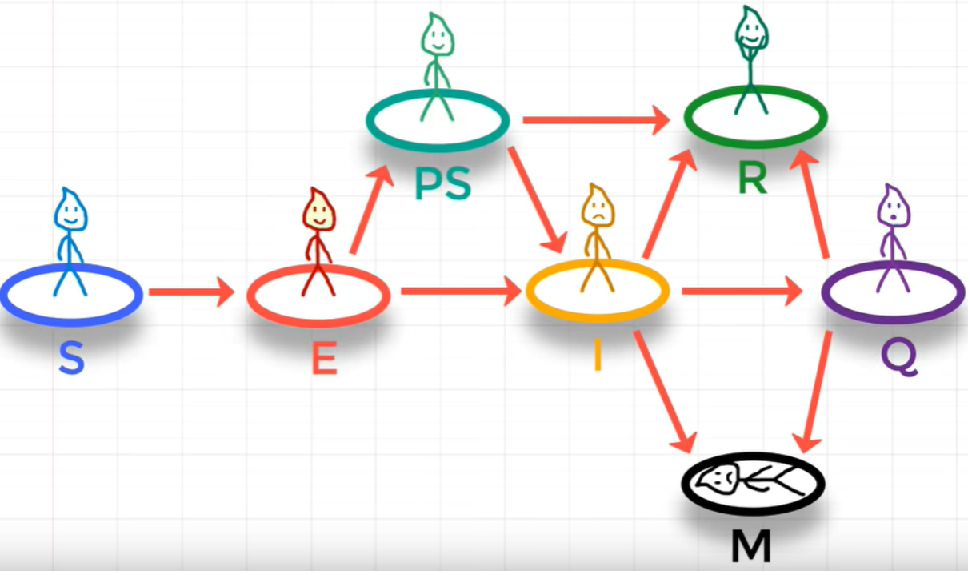

In [8]:
from IPython.display import Image

Image("modele_SEIRDQ.png", width=600, height=400)

La frise temporelle ci-dessous indique les différentes phases d'évolution de l'épidémie :

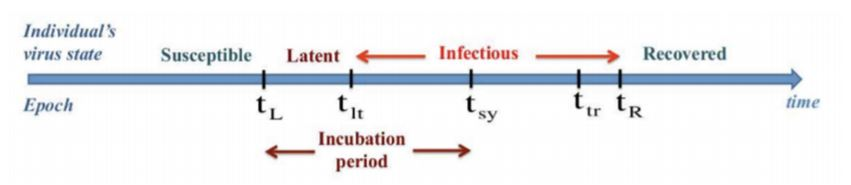

In [10]:
Image("ProgressionVirale_ModeleSEIR.jpg")

Les éléments mis en avant ci-dessous servent à justifier la priorité affichée par le système de santé d'aplatir la courbe d'évolution de l'épidémie.

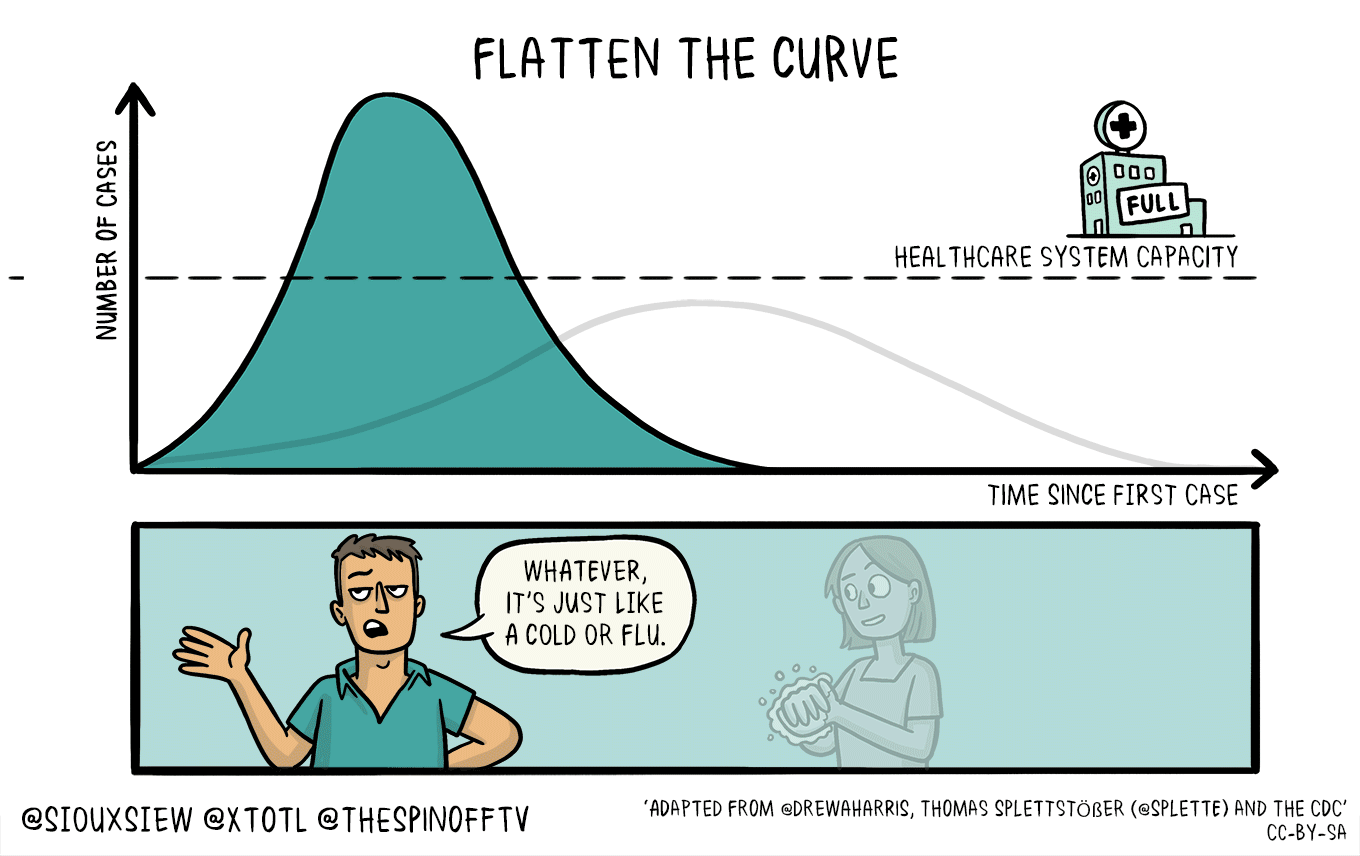

In [16]:
Image("aplatir_la_courbe.gif", width=600, height=400)

<a id="p2"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info">
    <font size=5 color="black"><b>2. Mise en équation</b></font>
</div>

Les modèles compartimentaux permettent d'estimer comment le nombre d'individus dans chaque compartiment varie au cours du temps.<br>

Par abus de notation, la lettre utilisée pour représenter un compartiment est également employée pour représenter le nombre d'individus dans le compartiment. Par exemple, $S$ est utilisé dans une équation pour représenter le nombre d'individus sains. Une formulation plus rigoureuse, et parfois employée, consiste à utiliser $S(t)$ à la place de $S$, ce qui explicite qu'il s'agit d'une fonction et que le nombre dépend du temps $t$. <br>

Pour savoir comment le nombre d'individus dans un compartiment varie au cours du temps, il est nécessaire de savoir comment déduire le nombre d'individus d'une étape à une autre, c'est-à-dire du temps $t$ au temps $t+1$. Cette différence dans le nombre d'individus est donnée par la dérivée. <br>

Ainsi, $dS/dt$ correspond à la balance du nombre d'individus par rapport au compartiment $S$. Une balance négative signifie que des individus sortent, tandis qu'une balance positive signifie que des individus entrent. La balance $dI/dt$ porte le nom d’incidence car elle représente le nombre d'infections de la maladie.

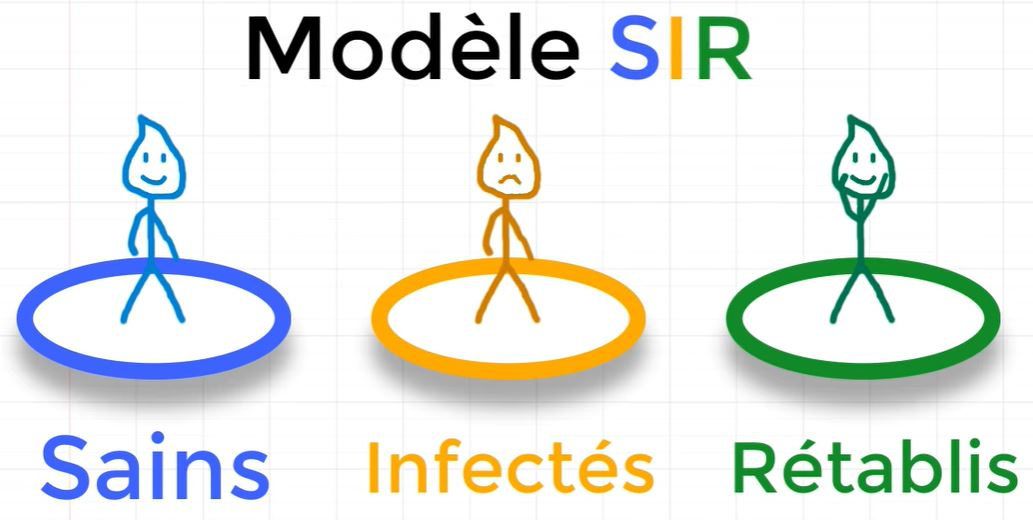

In [8]:
Image("ModeleSIR_1.jpg", width=600, height=400)

Dans le cas d'un modèle SIR, un individu commence sain, peut devenir infecté puis se remettre de sa maladie avec une immunisation. <br>
Si le <b>taux moyen de contagion</b>, qui dépend de l’infectiosité du virus et de la densité de population est noté $\beta$, alors 
$$\frac{\text{d}S}{\text{d}t} = - \frac{\beta}{N} \times S(t) \times I(t)$$.<br>

Pour un pas de temps donné, l'effectif d'individus sains diminue en fonction du nombre d’individus déjà infectés et du nombre d'individus encore non-infectés. Il y a une relation d'inter-dépendance entre les effectifs des 2 catégories.<br>
On peut noter que cette équation différentielle ordinaire (ou EDO) est conforme à la cinétique d'une réaction chimique élémentaire biomoléculaire.<br>

Si la proportion d'individus infectieux retirés de la population est $\gamma = 1/\lambda$ (exprimé en unité de $temps^{-1}$ c-a-d une fréquence, $\lambda$ désigne en fait la <b>durée moyenne de la période infectieuse</b>), alors $$dI/dt = \frac{\beta}{N} \times S(t) \times I(t) - \gamma \times I(t)$$<br>
Ceci traduit que l'évolution du nombre d'individus infectieux augmente avec ceux nouvellement infectés et diminue avec ceux retirés. <br>

Enfin, tous les individus guéris sont d'anciens individus infectieux (sur la même période), d'où 
$$\frac{\text{d}R}{\text{d}t} = \gamma \times I(t)$$.

En additionnant les trois équations différentielles, il apparaît que 
$$dS/dt + dI/dt + dR/dt = 0, $$ 
ce qui signifie que le nombre d'individus dans la population est toujours le même.

La condition pour que l'on relève le seuil épidémique (le nombre de malades dans le compartiment I augmente) est :<br>
$$ dI/dt > 0 \Leftrightarrow  \beta S(t) \lambda > 1$$

La quantité $\beta S \lambda$ est le nombre de reproduction noté <font face="cambria Math" size=4>R</font><br>
Le <b>taux de reproduction de base</b> <font face="cambria Math" size=4>R</font>$_0$ vaut $\beta N \lambda$.<br>

Quand $R_0 > 1$, chaque individu infectieux contaminera plus d’individus susceptibles en moyenne et la maladie se propagera à un nombre grandissant d’individus jusqu’à ce que le nombre de susceptibles soit trop faible et que $R < 1$. 

En conclusion, le système différentiel relatif au modèle SIR s'écrit :

<div align="right">
<font size=3>
$\begin{equation}
\left\lbrace\begin{array}{lcl}
\frac{\text{d}S}{\text{d}t} & = & - \frac{\beta}{N} \times S(t) \times I(t) \\ 
\frac{\text{d}I}{\text{d}t} & = &  \frac{\beta}{N} \times S(t) \times I(t) - \frac{1}{\lambda} \times I(t) \\
\frac{\text{d}R}{\text{d}t} & = & \frac{1}{\lambda} \times I(t)\\
\end{array} \right.
\end{equation}$&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;(1.1)&emsp;&emsp;
</font></div>

Le modèle plus avancé et noté <b>SEIRD</b> tient compte de la proportion des individus exposés à la contagion (en période d'incubation) et de la proportion d'individus morts du fait de la maladie. Il conduit au système différentiel suivant :<br>
il fait intervenir le paramètre $\delta$ relatif au taux de létalité de la maladie et $\sigma$ le taux d'individu exposés qui deviennent infectieux, il vaut l'inverse du taux d'incubation.

<div align="right">
<font size=3>
$\begin{equation}
\left\lbrace\begin{array}{lcl}
S'(t) & = & - \frac{\beta}{N} \times S(t) \times I(t) \\ 
E'(t) & = & \frac{\beta}{N} \times S(t) \times I(t) - \sigma \times E(t) - \delta \times I(t)\\
I'(t) & = & \sigma \times E(t) - \frac{1}{\lambda} \times I(t) \\
R'(t) & = & \frac{1}{\lambda} \times I(t)\\
D'(t) & = & \delta \times I(t)\\
\end{array} \right.
\end{equation}$&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; (1.2)&emsp;&emsp;
</font>
</div>

Remarque :<br>
Le taux de mortalité choisi est $\delta = 0.0113$ provient des données publiées par l'université John Hopkins, issu notamment des mesures sud-coréennes qui paraissent être les plus fiables compte-tenu de leur politique de détection massive de la population.
Le taux d'incubation moyen choisi est de 5.2 jours et  $\sigma = 1/5.2 \simeq 0.192$.
Le taux de propagation choisi est de 1.03.

<a id="p3"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info"><font size=5 color="black"><b>3. Mise en oeuvre avec Python</b></font></div>

<div class="alert alert-warning"><b><font face="Times" size=3 color="black">Import des packages Python</font></b> :
</div>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import *

# Import des packages pour l'implémentation du modèle stochastique
from math import log
from random import uniform

<div class="alert alert-info"><font size=4 color="black"><b>3.1 Modèle déterministe</b></font></div>

On définit un jeu de données pour calibrer le modèle

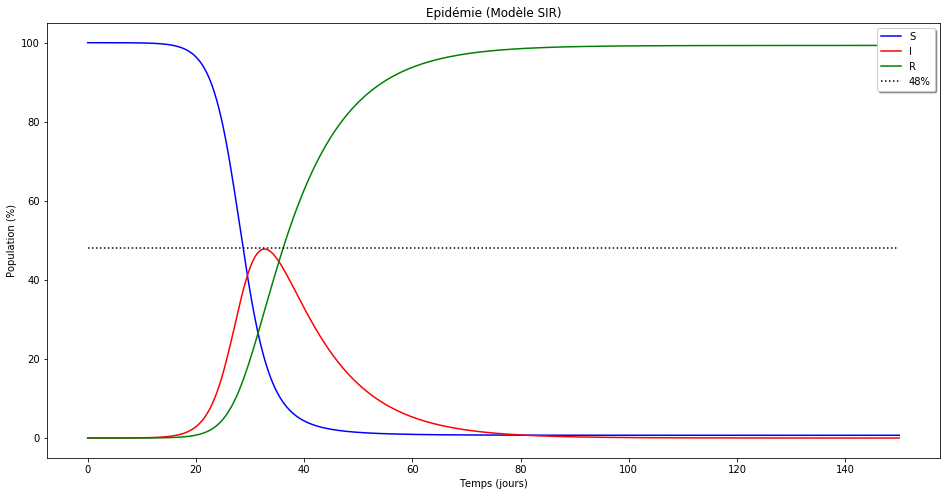

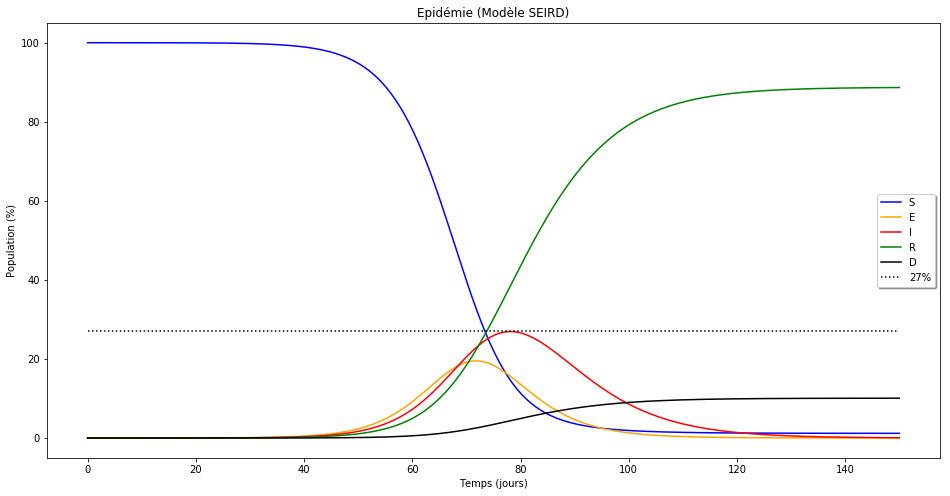

In [2]:
# Fonctions
def SIR(vals, t, b, g):
    S, I, R = vals           # assignation des parametres individuels d'entree <vals> au format tuple 
    
    dS = -b*S*I/N            # dS/dt = -beta*S(t)*I(t)/N
    dI = +b*S*I/N - g*I      # dI/dt = +beta*S(t)*I(t)/N - gamma * I(t)
    dR = +g*I                # dR/dt = +gamma*I(t)
    # on separe les 3 composants du système
    
    return [dS, dI, dR]

# Fonctions
def SEIRD(vals, t, b, g, s, d):
    S2, E, I, R, D = vals
    
    dS2 = -b*S2*I/N     # dS/dt
    dE = +b*S2*I/N - s*E
    dI = +s*E - g*I -d*I
    dR = +g*I
    dD = d*I
    # on separe les 5 composants du système
    
    return [dS2, dE, dI, dR, dD]

# Script principal de validation
# Initialisation
# Initialisations
N = 1*10**5       # Population initiale
E = 0             # individu initialement exposé au virus
I = 1             # individu initialement infecté
R = 0             # individu initialement rétabli
D = 0             # individu initialement décédé
S = N-I-R         # Population Saine (N = S+I+R)
S2 = N-E-I-R-D    # Population Saine (N = S+E+I+R+D)

beta = 0.5         # Taux d'infection (1 personne contamine en moyenne 3 autres individus)
#gamma1 = 1/5.5    # Taux de guérison (1/lambda ~ 5.5 jours)
gamma1 = 1/10.

gamma2 = 1/10 #0.183    # Taux de guérison (1/lambda ~ 2.3 jours) 
sigma = 1/5.2     # Taux d'incubation (1/Y ~ 5.2 jours)
delta = 1/88      # Taux de mortalité

T = 150           # Période de calcul

t = np.linspace(0, T, 360)    # division de la grille temporelle du calcul differentiel
x = [S, I, R]                 # parametres initiaux du systeme differentiel relatif au modele SIR a resoudre
y = [S, E, I, R, D]           # parametres initiaux du systeme differentiel relatif au modele SEIRD a resoudre
rates = (beta, gamma1)           # constantes paramétriques du modele SIR
rates2 = (beta, gamma2, sigma, delta)   # constantes paramétriques du modele SEIR

# Calcul
sol = odeint(SIR, x, t, args=rates)
sol2 = odeint(SEIRD, y, t, args=rates2)

# Plot ODE solutions
plt.figure(figsize=(16,8))
# modele SIR
seuil = 48
plt.plot(t, sol[:,0]*100/N, '-b')
plt.plot(t, sol[:,1]*100/N, '-r')
plt.plot(t, sol[:,2]*100/N, '-g')
plt.plot(t, [seuil]*len(t), ':k')
plt.xlabel('Temps (jours)')
plt.ylabel('Population (%)')
plt.legend(['S','I','R', str(seuil)+'%'],shadow=True)
plt.title('Epidémie (Modèle SIR)')
plt.show();

# modele SEIRD
seuil = 27
plt.figure(figsize=(16,8))
plt.plot(t, sol2[:,0]*100/N, '-b')
plt.plot(t, sol2[:,1]*100/N, 'orange')
plt.plot(t, sol2[:,2]*100/N, '-r')
plt.plot(t, sol2[:,3]*100/N, '-g')
plt.plot(t, sol2[:,4]*100/N, '-k')
plt.plot(t, [seuil]*len(t), ':k')
plt.legend(['S', 'E', 'I','R', 'D', str(seuil)+'%'],shadow=True)

plt.xlabel('Temps (jours)')
plt.ylabel('Population (%)')
plt.title('Epidémie (Modèle SEIRD)')
plt.show();

<a id="p3_2"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info"><font size=4 color="black"><b>3.2 Modèle stochastique</b></font></div>

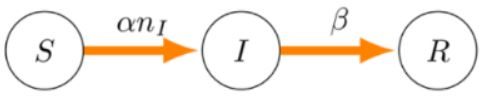

In [11]:
Image("Etats_SIR1.jpg")

À la différence d’un modèle déterministe, ce type de modèle utilise des nombres pour désigner la population d'individus sains (S), infectieux (I) ou rétablis (R) qui seront des entiers et chaque simulation sera différente de la précédente.

De manière plus formelle, un modèle stochastique peut être formulé comme un processus de Markov, où la probabilité d'une transition vers un nouvel état ne dépend que de l’état courant du système.
<br>


Les termes linéaires dans les équations différentielles du modèle déterministe (par exemple, $\beta S I$, $\gamma I$ dans le cas du modèle SIR) correspondent aux taux des événements dans le modèle stochastique.  
L’algorithme direct de <b>Gillespie</b> suppose que sur du temps continu (approximé) les évènements arrivent les uns après les autres. À chaque pas de temps, on considère que l’évènement ayant le taux le plus fort est aussi celui qui a la plus forte probabilité d’arriver.<br>

Les modèles sont généralement exécutés un grand nombre de fois afin d’estimer le résultat moyen et la variation autour de cette moyenne. Ce résultat moyen généré par les nombreuses simulations fournit des prédictions comparables à celles du modèle déterministe particulièrement lorsque la population est grande.

Dans le cas du modèle SEIR, à chaque itération, le temps et le nombre d’individus dans chaque classe S, E, I, R va être mis à jour en fonction de l’événement choisi.

In [3]:
def Gillespie(beta, gamma, N, n_S, n_I, n_R, V, t, T, dt_impact=25, beta2=0.):
    ''' Méthode directe de Gillespie est la plus utilisée dans le domaine de la modélisation épidémiologique
    Entree : alpha = Taux d'infection (probabilité qu'un individu soit infecté par unité de temps)
             beta = Taux de guerison (probabilité qu'un individu soit guéri par unité de temps)
             N = Population totale
             V = Volume du système (liée à la probabilité de contact entre deux individus)
    ''' 
    # Initialisations
    # Population initiale infectée n_I
    #n_I = 1

    # Population saine initiale n_S en fonction de la population totale et population rétablie n_R
    #n_S = N - n_I
    #n_R = 0
    
    # Liste des résultats numériques SIR_data
    SIR_data, tt = [], t
    SIR_data.append((tt, n_S, n_I, n_R))  # on ajoute sous forme de tuple
    
    
    # Boucle principale # https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo_cin%C3%A9tique
    while tt < T:
        if n_I == 0:   # Il n'y a plus d'infectés
            break
        
        if tt < dt_impact:
            a = beta
        else:               # mesures restrictives à t > dt_impact, on divise par 2 le taux de contagion voire plus ...
            a = beta2
        
        pI = a * n_S * n_I / V        # proportion d'individus infectés par unité de volume
        pR = gamma * n_I               # proportion d'individus guéris par unité de volume
        W = pI + pR                   # proportion totale d'individus des 2 catégories

        dt = -log(uniform(0.0, 1.0)) / W # distribution log normale 
        tt += dt

        # catégorisation des individus en fonction de la valeur seuil de l'état "infecté" simulée
        if uniform(0.0, 1.0) < pI / W:
            n_S -= 1; n_I += 1
        else:
            n_I -= 1; n_R += 1

        SIR_data.append((tt, n_S, n_I, n_R))
        
    return SIR_data

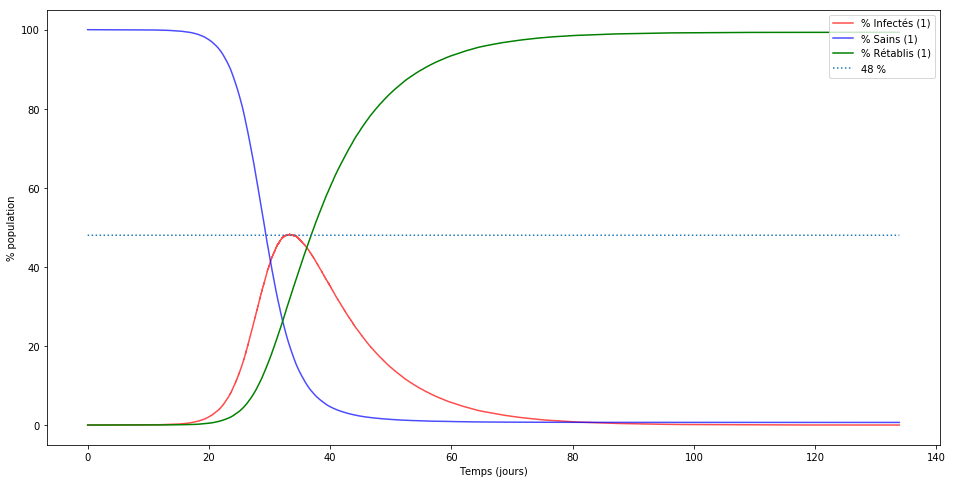

In [4]:
# Initialisations
N = 10**5       # Population totale
nI = 1         # Population initiale infectée n_I
nR = 0         # population rétablie n_R
t, T = 0., 150.  # période de calcul
V = 10**3       # Paramètre d'occupation spatiale
beta = 0.5/100     # taux d'infection
gamma = 10/100       # taux de guérison
seuil = 48

# Calcul
# scenario 1 : pas de restriction
SIR0 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=1000)
TabSIR0 = np.array(SIR0)

# Affichage graphique des résultats numériques
plt.figure(figsize=(16,8))

plt.plot(TabSIR0[:,0], TabSIR0[:,2]*100/N, '-r', alpha=0.7, label="% Infectés (1)")
plt.plot(TabSIR0[:,0], TabSIR0[:,1]*100/N, '-b', alpha=0.7, label="% Sains (1)")
plt.plot(TabSIR0[:,0], TabSIR0[:,3]*100/N, '-g', label="% Rétablis (1)")
plt.plot(TabSIR0[:,0], [seuil]*len(TabSIR0), ':', label=str(seuil)+" %")
plt.legend(loc='best')
plt.xlabel("Temps (jours)"); plt.ylabel("% population")
plt.show()


<a id="p4"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info"><font size=5 color="black"><b>4. Impact de mesures restrictives</b></font></div>

<div class="alert alert-info"><font size=4 color="black"><b>4.1 Effets de mesures de restriction sur le modèle SIR</b></font></div>

Nous pouvons maintenant modéliser les mesures de restriction appliquées par le gouvernement comme une diminution effective du taux d'infection, $\beta$, à un certain moment. Les résultats suivants sont obtenus en considérant que des mesures restrictives sont appliquées à $t = 25$, soit 5 jours avant que l'épidémie n'atteigne le pic obtenu dans la simulation précédente, avec une diminution effective de la moitié du taux d'infection, $\beta' = \frac{\beta}{2}$.

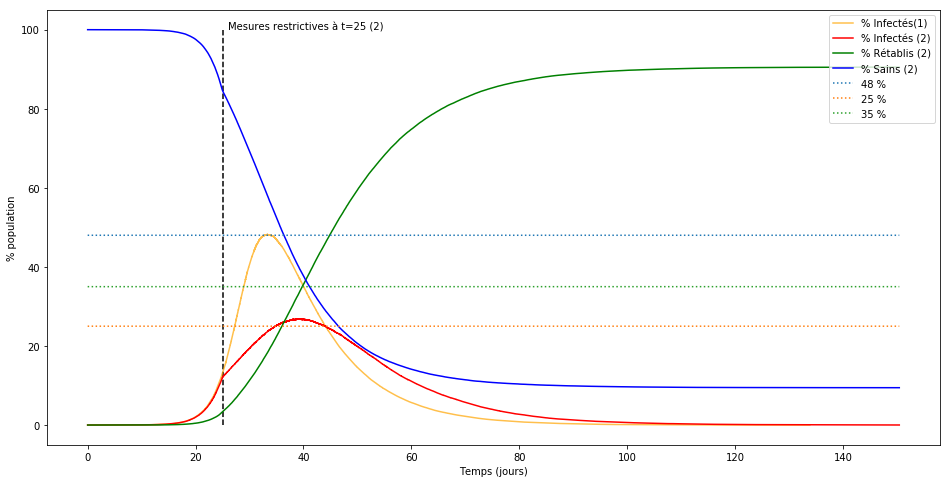

In [5]:
# Initialisations
dt_impact = 25
seuils = [48, 25, 35]

# scenario 2 : restriction à dt_impact=25
SIR = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impact, beta2=beta/2)
TabSIR = np.array(SIR)

# Affichage graphique des résultats numériques
plt.figure(figsize=(16,8))

plt.plot(TabSIR0[:,0], TabSIR0[:,2]*100/N, '-', color='orange', alpha=0.7, label="% Infectés(1)")
plt.plot(TabSIR[:,0], TabSIR[:,2]*100/N, '-r', label="% Infectés (2)")
plt.plot(TabSIR[:,0], TabSIR[:,3]*100/N, '-g', label="% Rétablis (2)")
plt.plot(TabSIR[:,0], TabSIR[:,1]*100/N, '-b', label="% Sains (2)")
plt.vlines(25, 0., 100., 'k', linestyles='dashed')
plt.text(26, 100, r"Mesures restrictives à t="+str(dt_impact)+" (2)")
for k in range(len(seuils)):
    plt.plot(TabSIR[:,0], [seuils[k]]*len(TabSIR), ':', label=str(seuils[k])+" %")
plt.legend(loc='best')
plt.xlabel("Temps (jours)"); plt.ylabel("% population")
plt.show()

En réduisant le taux d'infection à la moitié de sa valeur d'origine, le pic de l'infection atteint les 25% de la population, ce qui correspond également à la moitié de la valeur obtenue sans mesures de confinement.

<a id="p4_2"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info"><font size=4 color="black"><b>4.2 Influence du délai de la mise en application de mesures de restriction sur le modèle SIR</b></font></div>

Pour comprendre l'importance d'agir vite, on peut exécuter différentes simulations et appliquer les mesures de confinement à différents moments.<br>
Par exemple, si l'on envisage d'appliquer les mesures à $t = 30, 25, 20$ et $15$ et que leur effet est, comme auparavant, de réduire le taux d'infection $\beta$ à la moitié de sa valeur d'origine. Nous nous concentrons strictement sur l'évolution de la population infectée, il n'est donc pas nécessaire de tracer la fraction de la population saine et rétablie.

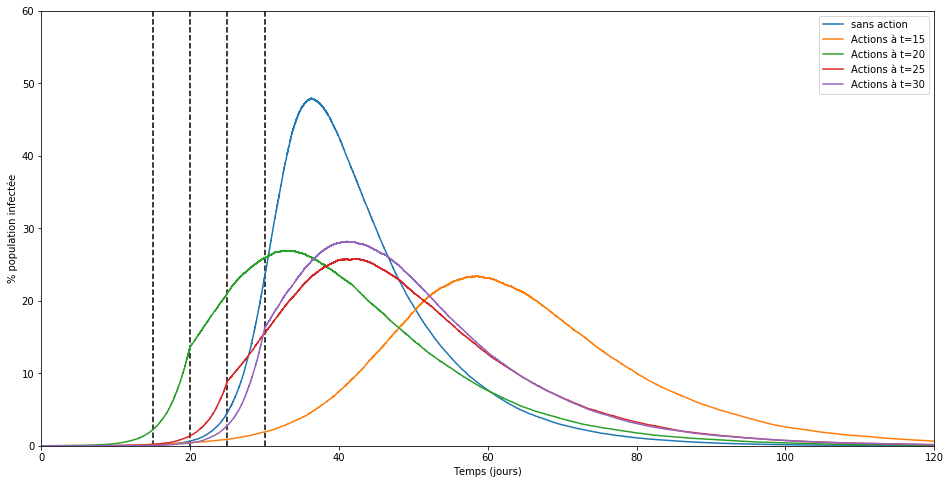

In [6]:
# Initialisations
N = 10**5       # Population totale
nI = 1         # Population initiale infectée n_I
nR = 0         # population rétablie n_R
t, T = 0., 150.  # période de calcul
V = 10**3       # Paramètre d'occupation spatiale
beta = 0.5/100     # taux d'infection avant l'application des mesures restrictives (beta/2)
gamma = 10/100       # taux de guérison
seuil = 48

# Calcul
# scenario 1 : pas de restriction
SIR0 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=1000)
TabSIR0 = np.array(SIR0)

# scenario 2 à 5 : restriction
dt_impacts = [15,20,25,30]
seuils = [48, 25, 35]

# scenario 2 : restriction à dt_impact=10
SIR1 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impacts[0], beta2=beta/2)
TabSIR1 = np.array(SIR1)
# scenario 3 : restriction à dt_impact=15
SIR2 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impacts[1], beta2=beta/2)
TabSIR2 = np.array(SIR2)
# scenario 4 : restriction à dt_impact=20
SIR3 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impacts[2], beta2=beta/2)
TabSIR3 = np.array(SIR3)
# scenario 5 : restriction à dt_impact=25
SIR4 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impacts[3], beta2=beta/2)
TabSIR4 = np.array(SIR4)

# Affichage graphique des résultats numériques
plt.figure(figsize=(16,8))

plt.plot(TabSIR0[:,0], TabSIR0[:,2]*100/N, label="sans action")
plt.plot(TabSIR1[:,0], TabSIR1[:,2]*100/N, label="Actions à t="+str(dt_impacts[0]))
plt.plot(TabSIR2[:,0], TabSIR2[:,2]*100/N, label="Actions à t="+str(dt_impacts[1]))
plt.plot(TabSIR3[:,0], TabSIR3[:,2]*100/N, label="Actions à t="+str(dt_impacts[2]))
plt.plot(TabSIR4[:,0], TabSIR4[:,2]*100/N, label="Actions à t="+str(dt_impacts[3]))

for k in range(len(dt_impacts)):
    plt.vlines(dt_impacts[k], 0., 100., 'k', linestyles='dashed')
    #plt.text(dt_impacts[k]+1, 60-dt_impacts[k], r"Mesures restrictives à t="+str(dt_impacts[k]))

plt.axis([0., 120., 0., 60.])
plt.legend(loc='best')
plt.xlabel("Temps (jours)"); plt.ylabel("% population infectée")
plt.show()

Comme nous pouvons le voir dans la figure présentée ci-dessus, plus il faut de temps pour appliquer les mesures de confinement, moins elles seront efficaces. Il sera en fait trop tard !<br>

D'un autre côté, si les mesures sont prises assez tôt, le pic de l'épidémie peut être considérablement réduit et décalé dans le temps. Néanmoins, on peut également observer que les mesures, en plus de diminuer le pic de l'infection, retardent la fin de l'épidémie. <br>
Il s'agit d'une situation inévitable, mais nous devons garder à l'esprit que la priorité est "d'aplatir la courbe" afin de ne pas saturer le système de santé. Cependant, ce retard est comme il est parce que le taux de guérison est maintenu constant, mais en réduisant le pic et en ne saturant pas le système de santé, on pourrait espérer que ce taux augmente (nouvelles avancées dans le traitement de la maladie, plus d'expérience du personnel sanitaire, etc.).<br>

La surface sous les courbes étant proches, la population impactée ici est la même si on se limite à observer les impact de ce seul paramètre $\beta$. 

<a id="p4_3"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info"><font size=4 color="black"><b>4.3 Influence du taux de contagion sur le modèle SIR</b></font></div>

Nous avons considéré qu'en appliquant les mesures de confinement, le taux d'infection effectif de l'épidémie diminuerait jusqu'à la moitié de sa valeur d'origine, ce qui pourrait être plus ou moins réaliste.<br>
Le but de ce traitement simplifié n'est pas de présenter un modèle réaliste pour prédire l'évolution du modèle mais d'illustrer l'importance des mesures de confinement.<br>

Un pas de plus dans cette illustration consiste à considérer qu'en prenant les mesures extrêmement au sérieux, très peu de gens sortiraient de leur domicile, de sorte que le taux d'infection effectif tendrait à zéro. Ainsi, nous pouvons étudier l’influence de prendre plus au sérieux les mesures appliquées en exécutant une simulation avec le taux d’infection effectif après les mesures fixées à $\beta' = 0$.

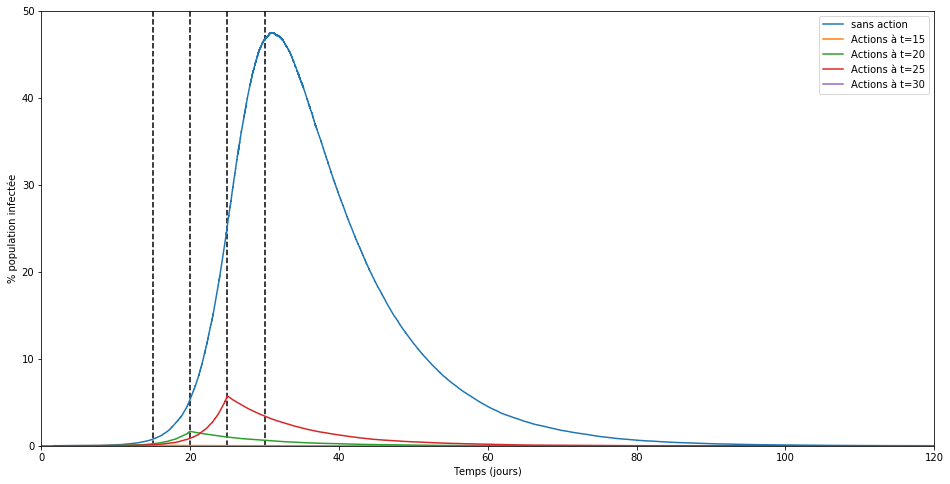

In [7]:
# Initialisations
N = 10**5       # Population totale
nI = 1         # Population initiale infectée n_I
nR = 0         # population rétablie n_R
t, T = 0., 150.  # période de calcul
V = 10**3       # Paramètre d'occupation spatiale
beta = 0.5/100     # taux d'infection avant la date de mise en place des mesures restrictives
gamma = 10/100       # taux de guérison
seuil = 48

# Calcul
# scenario 1 : pas de restriction
SIR0 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=1000)
TabSIR0 = np.array(SIR0)

# scenario 2 à 5 : restriction
dt_impacts = [15,20,25,30]
seuils = [48, 25, 35]

# scenario 2 : restriction à dt_impact=10
SIR1 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impacts[0], beta2=0.)
TabSIR1 = np.array(SIR1)
# scenario 3 : restriction à dt_impact=15
SIR2 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impacts[1], beta2=0.)
TabSIR2 = np.array(SIR2)
# scenario 4 : restriction à dt_impact=20
SIR3 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impacts[2], beta2=0.)
TabSIR3 = np.array(SIR3)
# scenario 5 : restriction à dt_impact=25
SIR4 = Gillespie(beta, gamma, N, N-nI-nR, nI, nR, V, t, T, dt_impact=dt_impacts[3], beta2=0.)
TabSIR4 = np.array(SIR4)

# Affichage graphique des résultats numériques
plt.figure(figsize=(16,8))

plt.plot(TabSIR0[:,0], TabSIR0[:,2]*100/N, label="sans action")
plt.plot(TabSIR1[:,0], TabSIR1[:,2]*100/N, label="Actions à t="+str(dt_impacts[0]))
plt.plot(TabSIR2[:,0], TabSIR2[:,2]*100/N, label="Actions à t="+str(dt_impacts[1]))
plt.plot(TabSIR3[:,0], TabSIR3[:,2]*100/N, label="Actions à t="+str(dt_impacts[2]))
plt.plot(TabSIR4[:,0], TabSIR4[:,2]*100/N, label="Actions à t="+str(dt_impacts[3]))

for k in range(len(dt_impacts)):
    plt.vlines(dt_impacts[k], 0., 100., 'k', linestyles='dashed')
    #plt.text(dt_impacts[k]+1, 60-dt_impacts[k], r"Mesures restrictives à t="+str(dt_impacts[k]))

plt.axis([0., 120., 0., 50.])
plt.legend(loc='best')
plt.xlabel("Temps (jours)"); plt.ylabel("% population infectée")
plt.show()

Les résultats montrent une baisse rapide de la population infectée après l'application des mesures. Comme précédemment, on observe que plus les mesures sont appliquées tôt, plus le pic de la population infectée sera petit. De plus, on constate que la fin de l'épidémie est avancée plutôt que retardée, ce qui était le cas de la situation précédente.<br>

Néanmoins, ce cas extrême d’absence de nouvelles infections après l’application des mesures ne peut être atteint dans la vie réelle, car il exigerait un confinement complet et parfait de toute la société.

<a id="p5"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info"><font size=5 color="black"><b>5. Conclusion</b></font></div>

Cela dit, comme première conclusion, nous avons vu qu'en considérant une épidémie appropriée (cela signifie qu'avec les taux d'infection et de rétablissement donnés, une épidémie existe), la fraction de la population infectée augmente de façon exponentielle. Ensuite, si aucune mesure n'est prise, cette croissance exponentielle se poursuivra jusqu'à ce qu'une grande partie de la population soit infectée. Dans une situation pratique, cela entraînerait l'effondrement du système de santé, entraînant un événement de mortalité élevée.

Ensuite, nous avons incorporé des mesures de confinement dans le modèle afin d'étudier leurs effets et comment ils dépendent de deux caractéristiques: le temps jusqu'à ce que les mesures soient appliquées et la force des mesures (qui peut être comprise comme le caractère restrictif des mesures ou la nombre de personnes qui les acceptent). Les résultats du premier cas montrent que pour une application précoce des mesures, le pic d'infection obtenu est remarquablement réduit, bien que la fin de l'épidémie soit retardée. Dans le second cas, on constate que des mesures plus fortes, en plus de diminuer le pic d'infection, font avancer la fin de l'épidémie.

<a id="p5"></a><div align="right"><a href="#top">Haut du document</a></div>

<div class="alert alert-info"><font size=5 color="black"><b>6. Références</b></font></div>

 * Ces travaux sont largement inspiré du contenu de l'article : https://towardsdatascience.com/should-you-stay-at-home-for-the-covid-19-a281156c9597. (22 mars 2020). <br>Cependant le code a été intégralement développé par mes soins et sous les 2 formes (déterministe et stochastique) car je les enseigne à IMT Alès, dans le but de valider un sujet pratique à proposer aux étudiants.<br><br>
 
 * Informations de vulgarisation mathématique du gouvernement : https://www.youtube.com/watch?v=-2tI3MQFqkI (14 mars 2020).<br><br>
 
 * J'ai par ailleurs entièrement développé et travaillé sur les scénarios publiés à travers l'article : https://blogs.mediapart.fr/bonamur/blog/260320/covid-19-et-modelisation-mathematique (26 mars 2020). Je ne suis pas d'accord avec la restitution finale dont les hypothèses ne me paraissent pas claires et les conclusions pessimistes.<br><br>
 
 * Thèse : "Séparation des Préoccupations en Épidémiologie". https://tel.archives-ouvertes.fr/tel-01506726v2/document (9 décembre 2016).<br><br>
 
 * Un bulletin publié "World-wide COVID-19 Outbreak Data Analysis and Prediction" : https://www.who.int/bulletin/online_first/20-255695.pdf. (18 mars 2020).<br><br>
 
 * Article Wikipedia pour appréhender le modèle stochastique et l'implémentation de la méthode de Monte-Carlo cinétique : https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo_cin%C3%A9tique.<br><br>
 
 * Article Wikipedia sur les modèles compartimentaux en épidémiologie : https://fr.wikipedia.org/wiki/Mod%C3%A8les_compartimentaux_en_%C3%A9pid%C3%A9miologie.
 